# Numerical Exercise 03

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


### Plain vanilla option pricing

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

#### Assignment
By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:
1. By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$. As usual, in computing statistical uncertainties, use data blocking.


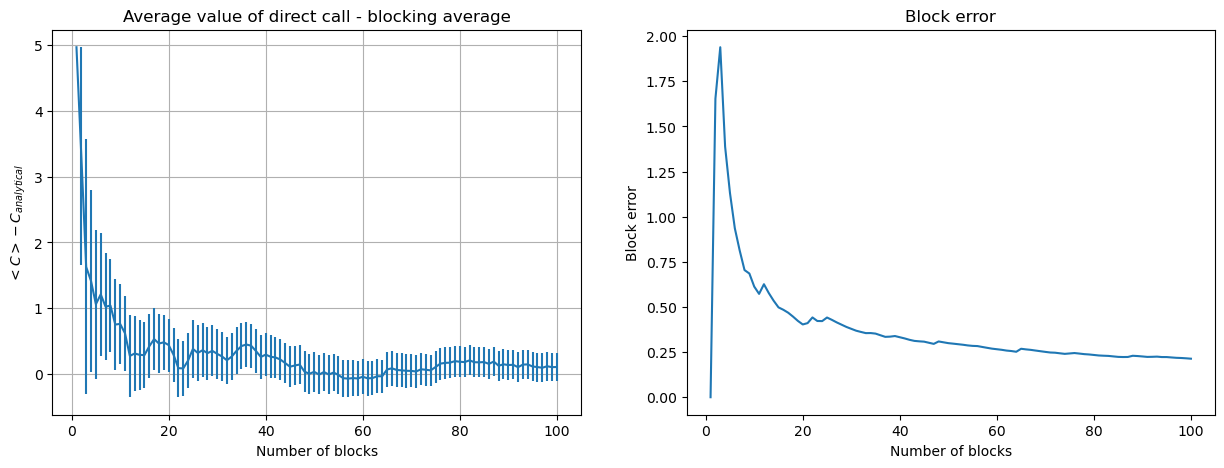

In [16]:
n_throws, cum_avg, block_error = np.loadtxt("../data/ex_03_call_direct.dat", unpack=True, usecols=(0,1,2))
colour = colors[0]
plt.figure(figsize=(15,5))
call = 14.975790778311286
plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg-call, yerr=block_error, color=colour)
plt.title("Average value of direct call - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$<C> - C_{analytical}$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)
plt.title("Block error")
plt.xlabel('Number of blocks')
plt.ylabel('Block error')

plt.show()

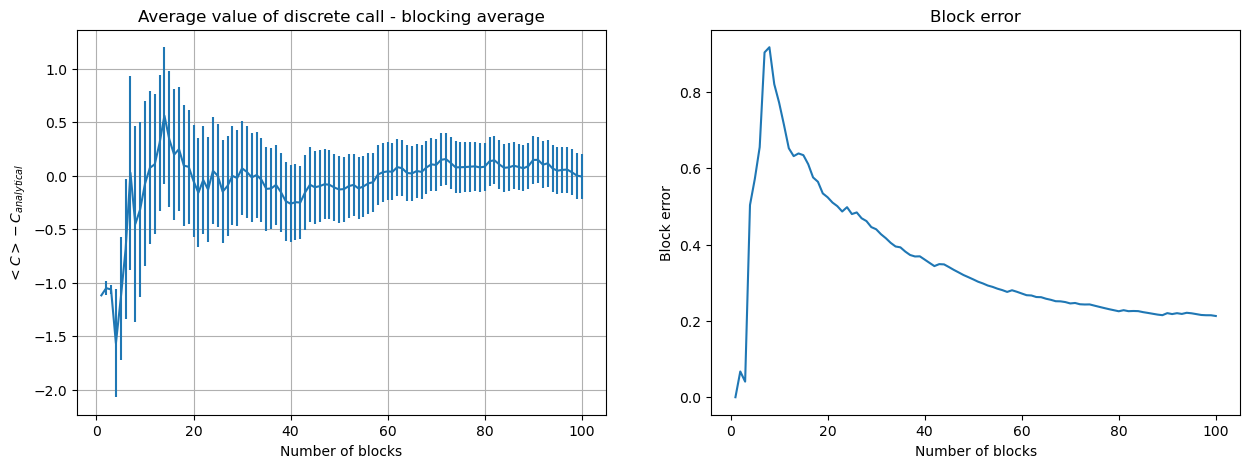

In [17]:
n_throws, cum_avg, block_error = np.loadtxt("../data/ex_03_call_discrete.dat", unpack=True, usecols=(0,1,2))
colour = colors[1]
plt.figure(figsize=(15,5))
call = 14.975790778311286
plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg-call, yerr=block_error, color=colour)
plt.title("Average value of discrete call - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$<C> - C_{analytical}$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)
plt.title("Block error")
plt.xlabel('Number of blocks')
plt.ylabel('Block error')

plt.show()

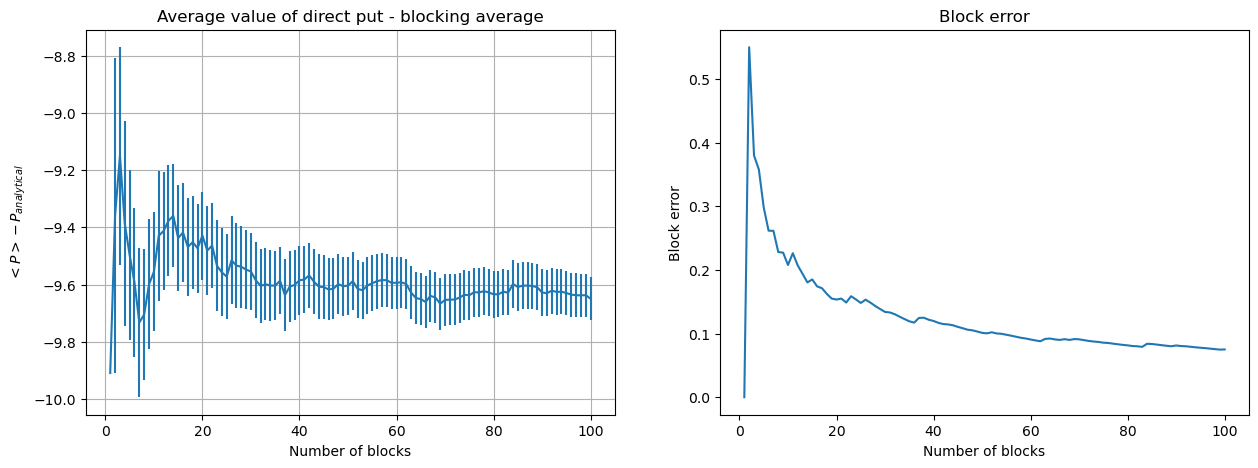

In [18]:
n_throws, cum_avg, block_error = np.loadtxt("../data/ex_03_put_direct.dat", unpack=True, usecols=(0,1,2))
colour = colors[2]
plt.figure(figsize=(15,5))
put = 5.4595325819072364
plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg-call, yerr=block_error, color=colour)
plt.title("Average value of direct put - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$<P> - P_{analytical}$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)
plt.title("Block error")
plt.xlabel('Number of blocks')
plt.ylabel('Block error')

plt.show()

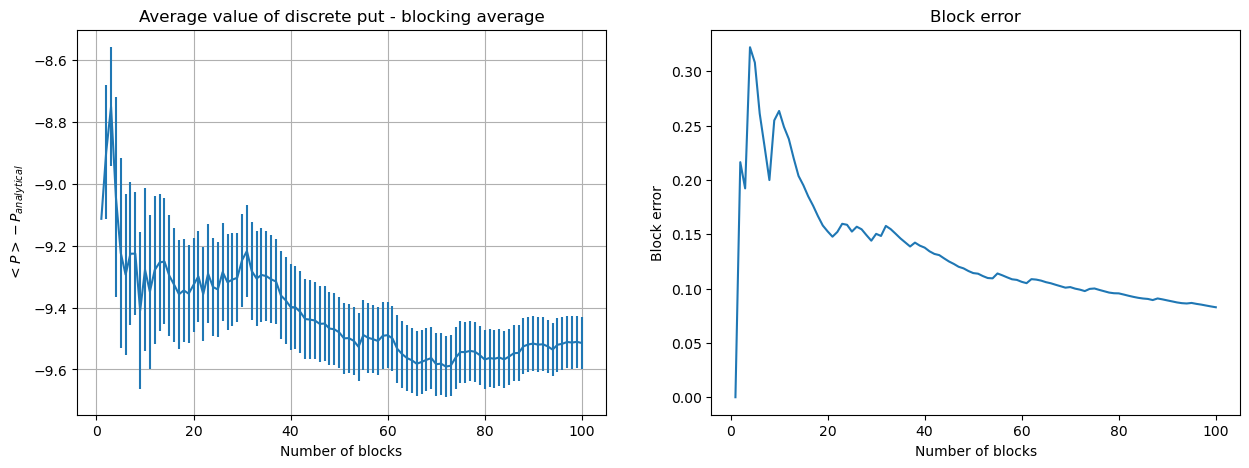

In [19]:
n_throws, cum_avg, block_error = np.loadtxt("../data/ex_03_put_discrete.dat", unpack=True, usecols=(0,1,2))
colour = colors[3]
plt.figure(figsize=(15,5))
put = 5.4595325819072364
plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg-call, yerr=block_error, color=colour)
plt.title("Average value of discrete put - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$<P> - P_{analytical}$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)
plt.title("Block error")
plt.xlabel('Number of blocks')
plt.ylabel('Block error')

plt.show()